In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-sentiment-analysis/__results__.html
/kaggle/input/twitter-sentiment-analysis/encoder.pkl
/kaggle/input/twitter-sentiment-analysis/model.h5
/kaggle/input/twitter-sentiment-analysis/__output__.json
/kaggle/input/twitter-sentiment-analysis/model.w2v
/kaggle/input/twitter-sentiment-analysis/tokenizer.pkl
/kaggle/input/twitter-sentiment-analysis/custom.css
/kaggle/input/twitter-sentiment-analysis/__results___files/__results___14_1.png
/kaggle/input/twitter-sentiment-analysis/__results___files/__results___59_0.png
/kaggle/input/twitter-sentiment-analysis/__results___files/__results___49_1.png
/kaggle/input/twitter-sentiment-analysis/__results___files/__results___49_0.png


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualization style
sns.set(style="whitegrid")
print("Libraries imported successfully.")


Libraries imported successfully.


In [7]:
# Define column names (Dataset has no headers)
columns = ['Tweet_ID', 'Entity', 'Sentiment', 'Tweet_Content']

try:
    # Attempt to load local file
    df = pd.read_csv('/kaggle/input/twitter-training/twitter_training.csv', names=columns, header=None)
    print("Local 'twitter_training.csv' loaded successfully.")
except FileNotFoundError:
    print("Local file not found. Attempting to load from remote source...")
    try:
        # Fallback to a raw GitHub URL (Mirror of the Kaggle dataset)
        url = "https://raw.githubusercontent.com/GuviMentor88/Training-Datasets/main/twitter_training.csv"
        df = pd.read_csv(url, names=columns, header=None)
        print("Remote dataset loaded successfully.")
    except Exception as e:
        print(f"Error loading remote data: {e}")
        print("Please download 'twitter_training.csv' from Kaggle and upload it to your workspace.")


Local 'twitter_training.csv' loaded successfully.


In [8]:
# Check initial shape
print(f"Original shape: {df.shape}")

# Drop rows with missing tweet content
df.dropna(subset=['Tweet_Content'], inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Verify cleaning
print(f"Cleaned shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())


Original shape: (74682, 4)
Cleaned shape: (71656, 4)

First 5 rows:


,Tweet_ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


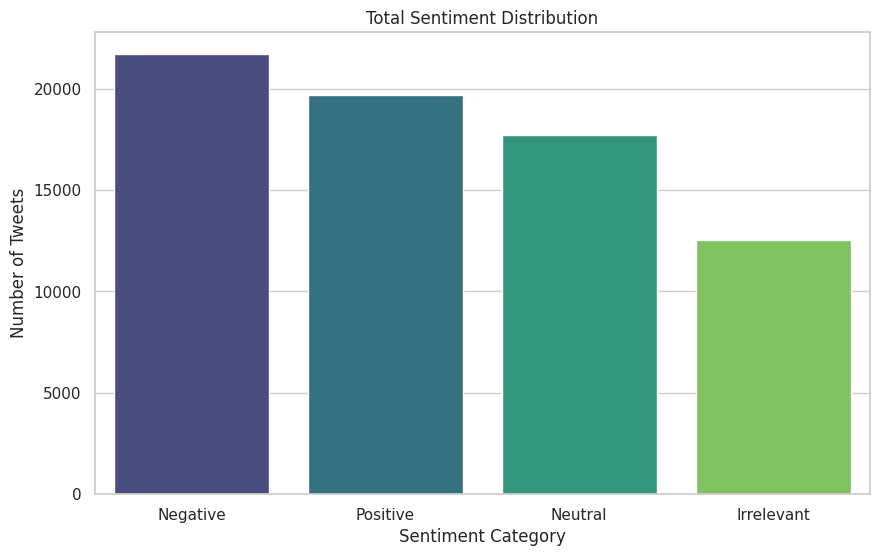

In [9]:
plt.figure(figsize=(10, 6))
# Order the bars by count for better readability
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

plt.title('Total Sentiment Distribution')
plt.ylabel('Number of Tweets')
plt.xlabel('Sentiment Category')
plt.show()


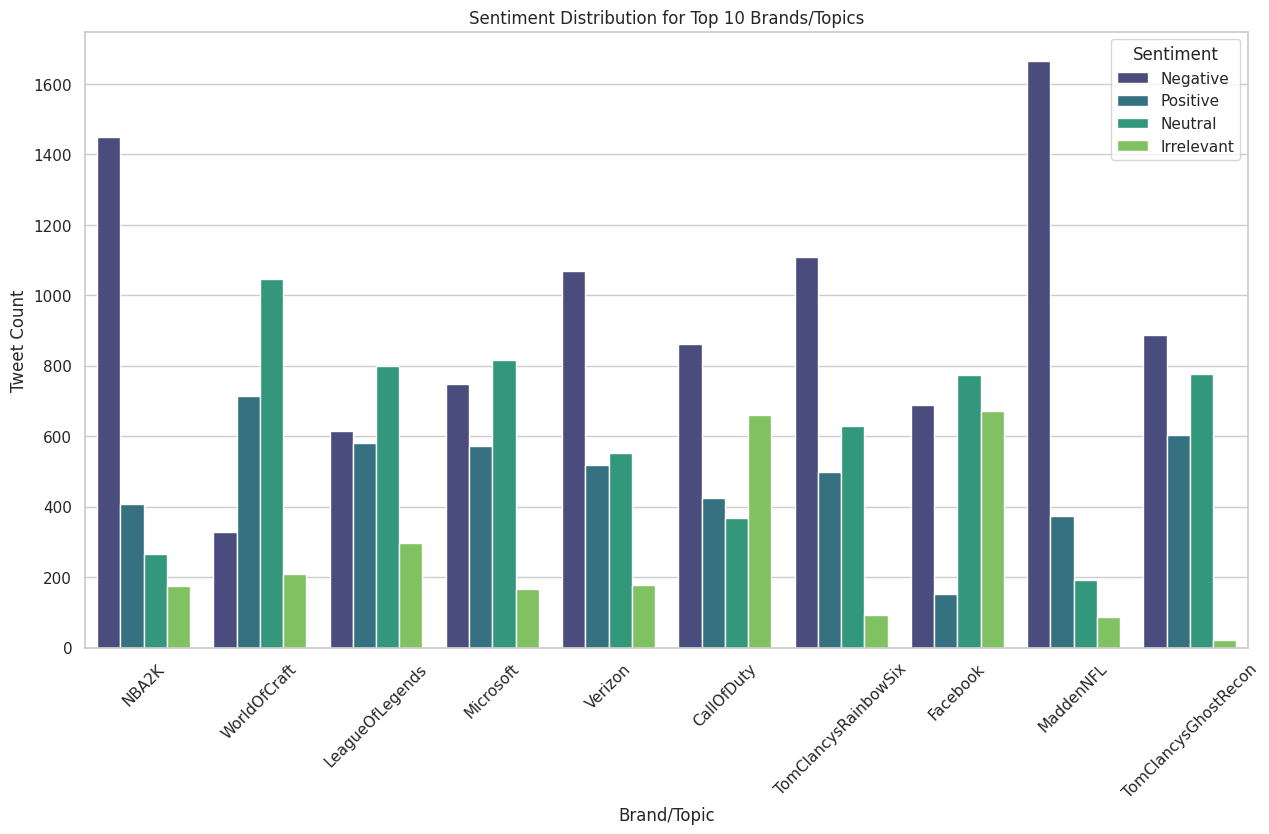

In [10]:
# Filter for the top 10 most frequent entities to keep the chart readable
top_10_entities = df['Entity'].value_counts().head(10).index
df_top = df[df['Entity'].isin(top_10_entities)]

plt.figure(figsize=(15, 8))
sns.countplot(x='Entity', hue='Sentiment', data=df_top, palette='viridis')

plt.title('Sentiment Distribution for Top 10 Brands/Topics')
plt.xlabel('Brand/Topic')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()


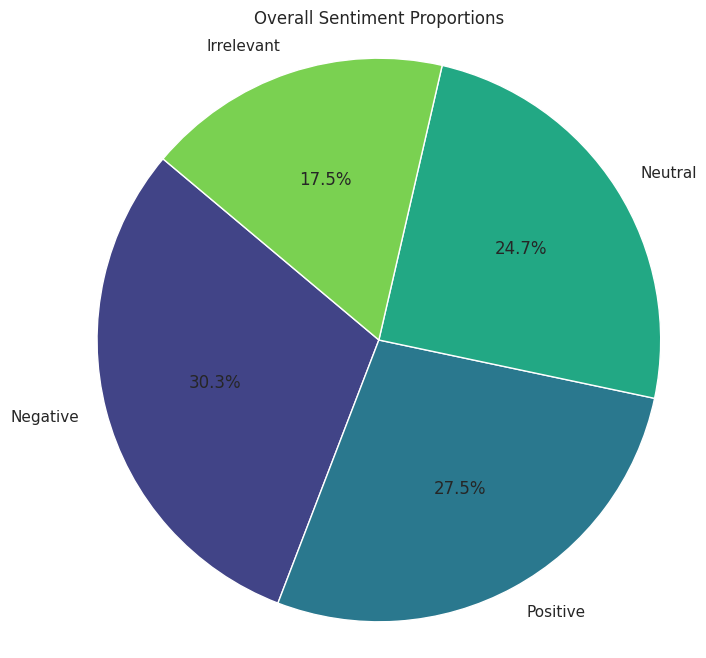

In [11]:
plt.figure(figsize=(8, 8))
sentiment_counts = df['Sentiment'].value_counts()

plt.pie(sentiment_counts, 
        labels=sentiment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('viridis', 4))

plt.title('Overall Sentiment Proportions')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.show()
